In [1]:
import pandas as pd

file_path = 'access_measurements.csv'

column_names = [
    'w-quantization', 'grd-quantization', 'imputation', 'access',
    'query type', 'time', 'stop cond', 'iters'
]

df = pd.read_csv(file_path, header=None, names=column_names)

print(df.head())

   w-quantization  grd-quantization  imputation  access query type  time   
0               3                 1           0      29          w   0.0  \
1               3                 1           0     376        grd   0.0   
2               3                 1           0      29          w   0.0   
3               3                 1           0     376        grd   0.0   
4               3                 1           0      29          w   0.0   

   stop cond  iters  
0          0      0  
1          0      0  
2          0      0  
3          0      0  
4          0      0  


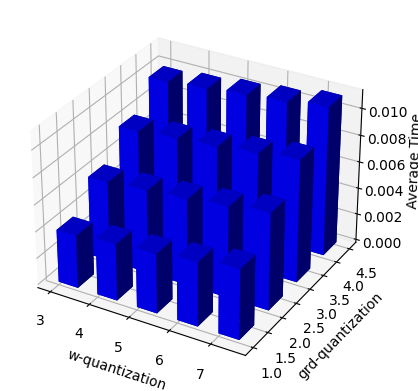

In [3]:
import numpy as np

df_numeric = df.select_dtypes(include=[np.number])

grouped = df_numeric.groupby(['w-quantization', 'grd-quantization']).mean()

# Reset the index to make plotting easier
grouped = grouped.reset_index()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Setting up the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Data for the bars
x = grouped['w-quantization']
y = grouped['grd-quantization']
z = grouped['time']  # or any other column you wish to visualize

# The bar positions and width
dx = dy = 0.5
dz = z

ax.bar3d(x, y, [0]*len(z), dx, dy, dz, color='b')

# Labeling the axes
ax.set_xlabel('w-quantization')
ax.set_ylabel('grd-quantization')
ax.set_zlabel('Average Time Per Query')

# Show the plot
plt.show()

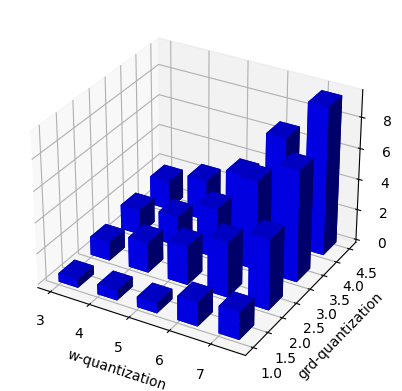

In [18]:
import numpy as np

df_numeric = df.select_dtypes(include=[np.number])

grouped = df_numeric.groupby(['w-quantization', 'grd-quantization']).sum()

# Reset the index to make plotting easier
grouped = grouped.reset_index()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Setting up the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Data for the bars
x = grouped['w-quantization']
y = grouped['grd-quantization']
z = grouped['time']  # or any other column you wish to visualize

# The bar positions and width
dx = dy = 0.5
dz = z/100

ax.bar3d(x, y, [0]*len(z), dx, dy, dz, color='b')

# Labeling the axes
ax.set_xlabel('w-quantization')
ax.set_ylabel('grd-quantization')
ax.set_zlabel('Average Time Per Query')

# Show the plot
plt.show()

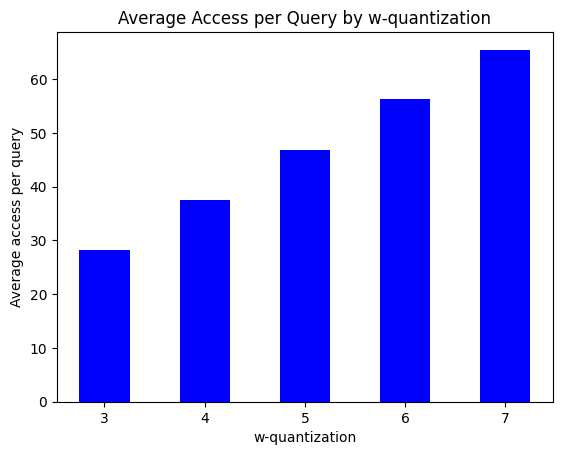

In [15]:
filtered_df = df[df['query type'] == 'w']

filtered_df = filtered_df.drop(columns=['query type'])

# Now, group by 'w-quantization' and 'grd-quantization', and calculate the mean
grouped = filtered_df.groupby('w-quantization').mean().reset_index()

# Create a figure for 2D plotting
fig, ax = plt.subplots()

# Data for the bars
x = grouped['w-quantization']  # the categorical x-axis
z = grouped['access']  # Assuming 'access' is the column you wish to visualize the average of

# Create 2D bars
ax.bar(x, z, color='b', width=0.5)  # Adjust width as needed

# Labeling the axes
ax.set_xlabel('w-quantization')
ax.set_ylabel('Average access per query')

# Optionally add title or other stylistic elements
ax.set_title('Average Access per Query by w-quantization')

# Show the plot
plt.show()

In [22]:
df_stop = df[df['stop cond'] != 0]

grouped_mode = df_stop.groupby(['w-quantization', 'grd-quantization']).agg(lambda x: x.mode().iloc[0])

# Reset the index if you want the group by columns as regular columns
grouped_mode = grouped_mode.reset_index()

# Display the result
print(grouped_mode)

    w-quantization  grd-quantization  imputation  access query type      time   
0                3                 1           0       0          0  0.336417  \
1                3                 2           0       0          0  0.507478   
2                3                 3           0       0          0  0.674725   
3                3                 4           0       0          0  0.844096   
4                4                 1           0       0          0  0.358099   
5                4                 2           0       0          0  0.526413   
6                4                 3           0       0          0  0.697016   
7                4                 4           0       0          0  0.866510   
8                5                 1           0       0          0  0.378132   
9                5                 2           0       0          0  0.550378   
10               5                 3           0       0          0  0.717103   
11               5          

In [ ]:
# pipeline

# data loader:::
# takes real dataset and cleans/pads it so that it works with our implementation
# data generator. should generalize the gen data func to maybe use different distributions to generate data, different noise levels
# plotting pipline. need to run the algorithm on an increased range combinatinos of quantization levels several times to get a better idea of it's overall performance
# then nee to make the plots for that run given the other parameters associated with the data.
# also need to make sure that the unquantized version of the code works